# Data analysis for the detection of malignant tumors
This project serves as a tutorial aimed at providing a comprehensive overview of the fundamental steps involved in conducting a data analysis. It is important to note that the dataset used for this tutorial has an unknown source and is solely intended for academic purposes.

Within this dataset, we encounter various features associated with physical metrics of tumors, alongside a target feature indicating whether the tumor is malignant or benign. The primary objective of the analytics process is to investigate potential relationships between the column features and the target variable.

In this initial notebook, is presented an introductory exploration of the dataset, including an analysis of the frequency distribution of the fields. This serves as a foundation for further investigation and analysis.



<strong> Imports </strong>

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<strong> Functions definitions </strong>

In [19]:
%run ./utils/common_functions

## Initial understanding of the data

In [4]:
# Reading and describing the dataset
data = pd.read_excel("Data/dataset.xlsx")
data.describe()

,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,smoothness error,...,fractal dimension error,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,91.969033,654.889104,5377.895132,3980.661705,3182.592619,3688.309315,1646.874815,5670.012408,3282.404991,5126.585272,...,3190.105448,107.261213,880.583128,1805.333199,3057.893638,3342.562953,3522.805009,2579.883726,6252.102144,0.627417
std,24.298981,351.914129,3913.131035,2989.030918,2539.061641,2807.699479,551.411382,1881.697556,2123.997793,2601.650049,...,1905.398844,33.602542,569.356993,2096.339851,2246.913730,2388.022073,2925.751290,1043.926612,2974.633150,0.483918
min,43.790000,143.500000,0.100000,0.060000,0.000000,0.000000,0.180000,0.060000,0.210000,0.010000,...,6.000000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.210000,0.120000,0.000000
25%,75.170000,420.300000,1071.000000,1289.000000,1357.000000,1471.000000,1555.000000,5636.000000,1916.000000,3704.000000,...,1906.000000,84.110000,515.300000,1166.000000,1574.000000,1521.000000,1339.000000,2355.000000,6037.000000,0.000000
50%,86.240000,551.100000,7721.000000,2839.000000,2367.000000,2799.000000,1739.000000,6077.000000,2841.000000,5498.000000,...,2817.000000,97.660000,686.500000,1327.000000,2376.000000,2884.000000,2089.000000,2741.000000,7313.000000,1.000000
75%,104.100000,782.700000,8946.000000,6698.000000,4479.000000,5736.000000,1943.000000,6566.000000,4245.000000,6908.000000,...,4198.000000,125.400000,1084.000000,1494.000000,4002.000000,4704.000000,6136.000000,3113.000000,8194.000000,1.000000
max,188.500000,2501.000000,9997.000000,9965.000000,9966.000000,9961.000000,2906.000000,9744.000000,9948.000000,9976.000000,...,9875.000000,251.200000,4254.000000,9994.000000,9995.000000,9996.000000,9993.000000,6638.000000,9981.000000,1.000000


In [5]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,1184.0,2776.00,3001.0,1471.0,2419.0,7871.0,...,17.33,184.60,2019.0,1622.0,6656.0,7119.0,2654.0,4601.0,1189.0,0
1,20.57,17.77,132.90,1326.0,8474.0,7864.00,869.0,7017.0,1812.0,5667.0,...,23.41,158.80,1956.0,1238.0,1866.0,2416.0,186.0,275.0,8902.0,0
2,19.69,21.25,130.00,1203.0,1096.0,1599.00,1974.0,1279.0,2069.0,5999.0,...,25.53,152.50,1709.0,1444.0,4245.0,4504.0,243.0,3613.0,8758.0,0
3,11.42,20.38,77.58,386.1,1425.0,2839.00,2414.0,1052.0,2597.0,9744.0,...,2020-05-26 00:00:00,98.87,567.7,2098.0,8663.0,6869.0,2575.0,6638.0,173.0,0
4,20.29,14.34,135.10,1297.0,1003.0,1328.00,198.0,1043.0,1809.0,5883.0,...,16.67,152.20,1575.0,1374.0,205.0,0.4,1625.0,2364.0,7678.0,0
5,12.45,2020-07-15 00:00:00,82.57,477.1,1278.0,0.17,1578.0,8089.0,2087.0,7613.0,...,23.75,103.40,741.6,1791.0,5249.0,5355.0,1741.0,3985.0,1244.0,0
6,18.25,19.98,119.60,1040.0,9463.0,109.00,1127.0,74.0,1794.0,5742.0,...,27.66,153.20,1606.0,1442.0,2576.0,3784.0,1932.0,3063.0,8368.0,0
7,13.71,20.83,90.20,577.9,1189.0,1645.00,9366.0,5985.0,2196.0,7451.0,...,28.14,110.60,897.0,1654.0,3682.0,2678.0,1556.0,3196.0,1151.0,0
8,13.0,21.82,87.50,519.8,1273.0,1932.00,1859.0,9353.0,235.0,7389.0,...,30.73,106.20,739.3,1703.0,5401.0,539.0,206.0,4378.0,1072.0,0
9,12.46,2020-04-24 00:00:00,83.97,475.9,1186.0,2396.00,2273.0,8543.0,203.0,8243.0,...,40.68,97.65,711.4,1853.0,1058.0,1105.0,221.0,4366.0,2075.0,0


There appear to be format inconsistencies in the columns, and it seems that most of the fields are numerical. To verify these observations, a function will be employed to determine whether all the values in the columns can be successfully converted to numerics.

In [6]:
# Function that counts the non numeric values per column
_ = data.apply(count_non_numeric_values, axis = 0)

In the column mean radius There are 113 non numeric values which represent a ratio of 19.86 %
In the column mean texture There are 111 non numeric values which represent a ratio of 19.51 %
In the column mean perimeter There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean area There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean smoothness There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean compactness There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean concavity There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean concave points There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean symmetry There are 0 non numeric values which represent a ratio of 0.0 %
In the column mean fractal dimension There are 0 non numeric values which represent a ratio of 0.0 %
In the column radius error There are 0 non numeric values

In overall, the majority of the fields are numerical. At next we will observe the non numerical values to understand their format.

In [7]:
# Function that counts the non numeric values per column
_ = data.apply(display_non_numeric_values, axis = 0)

**************************************************
**************************************************
Displaying non numeric values from the column mean radius


10     2020-02-16 00:00:00
20     2020-08-13 00:00:00
28     2020-03-15 00:00:00
32     2020-02-17 00:00:00
37     2020-03-13 00:00:00
              ...         
529    2020-07-12 00:00:00
560    2020-05-14 00:00:00
561    2020-02-11 00:00:00
566    2020-06-16 00:00:00
567    2020-06-20 00:00:00
Name: mean radius, Length: 113, dtype: object

**************************************************
**************************************************
Displaying non numeric values from the column mean texture


5      2020-07-15 00:00:00
9      2020-04-24 00:00:00
12     2020-08-24 00:00:00
23     2020-04-23 00:00:00
25     2020-04-16 00:00:00
              ...         
531    2020-02-20 00:00:00
543    2020-06-28 00:00:00
544    2020-07-20 00:00:00
563    2020-09-25 00:00:00
566    2020-08-28 00:00:00
Name: mean texture, Length: 111, dtype: object

**************************************************
**************************************************
Displaying non numeric values from the column texture error


31     2020-03-01 00:00:00
122    2020-12-03 00:00:00
156    2020-04-01 00:00:00
157    2020-06-02 00:00:00
190    2020-11-02 00:00:00
301    2020-04-01 00:00:00
319    2020-02-02 00:00:00
349    2020-05-01 00:00:00
358    2020-02-01 00:00:00
507    2020-03-01 00:00:00
515    2020-01-01 00:00:00
556    2020-09-02 00:00:00
Name: texture error, dtype: object

**************************************************
**************************************************
Displaying non numeric values from the column perimeter error


12     2020-07-11 00:00:00
26     2020-11-02 00:00:00
108    2020-05-10 00:00:00
148    2020-12-02 00:00:00
258    2020-12-10 00:00:00
348    2020-09-01 00:00:00
377    2020-04-01 00:00:00
479    2020-07-03 00:00:00
521    2020-05-07 00:00:00
Name: perimeter error, dtype: object

**************************************************
**************************************************
Displaying non numeric values from the column area error


21     2020-07-15 00:00:00
26     2020-05-21 00:00:00
49     2020-02-20 00:00:00
66     2020-02-14 00:00:00
97     2020-05-20 00:00:00
120    2020-05-10 00:00:00
145    2020-03-25 00:00:00
148    2020-02-21 00:00:00
173    2020-08-19 00:00:00
194    2020-02-25 00:00:00
208    2020-09-15 00:00:00
211    2020-12-17 00:00:00
220    2020-04-17 00:00:00
221    2020-03-21 00:00:00
222    2020-05-15 00:00:00
235    2020-07-22 00:00:00
259    2020-02-23 00:00:00
266    2020-01-27 00:00:00
276    2020-09-17 00:00:00
283    2020-09-28 00:00:00
296    2020-09-11 00:00:00
303    2020-08-10 00:00:00
306    2020-05-15 00:00:00
311    2020-09-28 00:00:00
318    2020-02-24 00:00:00
324    2020-01-19 00:00:00
333    2020-07-15 00:00:00
341    2020-07-12 00:00:00
342    2020-08-10 00:00:00
346    2020-02-18 00:00:00
347    2020-06-29 00:00:00
350    2020-03-26 00:00:00
360    2020-03-28 00:00:00
380    2020-04-16 00:00:00
383    2020-02-19 00:00:00
387    2020-12-23 00:00:00
399    2020-06-25 00:00:00
4

**************************************************
**************************************************
Displaying non numeric values from the column worst radius


7      2020-06-17 00:00:00
9      2020-09-15 00:00:00
14     2020-03-15 00:00:00
16     2020-07-19 00:00:00
19     2020-11-15 00:00:00
              ...         
535    2020-03-24 00:00:00
544    2020-05-15 00:00:00
549    2020-03-13 00:00:00
551    2020-02-12 00:00:00
560    2020-03-15 00:00:00
Name: worst radius, Length: 121, dtype: object

**************************************************
**************************************************
Displaying non numeric values from the column worst texture


3      2020-05-26 00:00:00
22     2020-08-19 00:00:00
25     2020-04-21 00:00:00
31     2020-12-28 00:00:00
33     2020-09-30 00:00:00
              ...         
532    2020-02-20 00:00:00
545    2020-09-29 00:00:00
547    2020-04-22 00:00:00
553    2020-05-25 00:00:00
564    2020-04-26 00:00:00
Name: worst texture, Length: 105, dtype: object


The non-numerical values appear to be formatted as dates, suggesting a potential formatting error in Excel. To gain a better understanding of the frequency of these values within the entire dataset, a mask plot can be used to visualize their volume.

C:\Users\CALA ARIAS\AppData\Local\Temp\ipykernel_48304\2878444270.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_mask = data.applymap(lambda x: isinstance(x, datetime.datetime))


Text(0.5, 1.0, 'White spaces represent the non numerical datetime value')

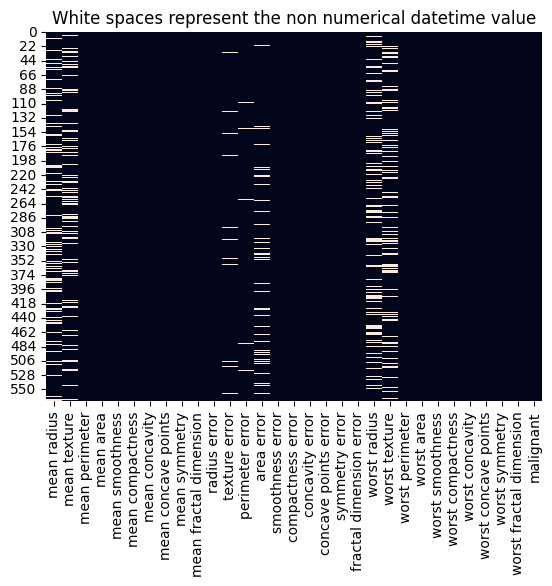

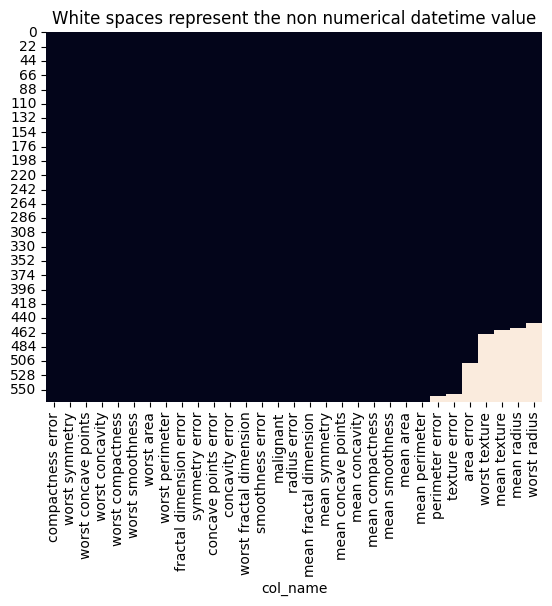

In [8]:
# Plotting the mask plot without ordering
data_mask = data.applymap(lambda x: isinstance(x, datetime.datetime))
plt.figure()
ax = sns.heatmap(data_mask, cbar=False)
ax.set_title('White spaces represent the non numerical datetime value')

# Plotting the mask plot with ordering
## Ordering rows
for col_name in data_mask.columns:
    data_mask.loc[:,col_name] = data_mask[col_name].sort_values(ascending=True).values
## Ordering columns
cols_ranking = []
for col_name in data.columns:
    count_value,_ = count_non_numeric_values(data[col_name], verbose = False)
    cols_ranking.append([col_name,count_value])
cols_ranking = pd.DataFrame(cols_ranking, columns = ["col_name", "ranking"])
cols_ranking = cols_ranking.sort_values(by = ["ranking"])
data_mask_tmp = data_mask.copy()
for i_col, col_name in enumerate(cols_ranking["col_name"]):
    data_mask_tmp.iloc[:, i_col] = data_mask.loc[:, col_name]
data_mask = data_mask_tmp
data_mask.columns = cols_ranking["col_name"]
# Plot the ordered mask plot
plt.figure()
ax = sns.heatmap(data_mask, cbar=False)
ax.set_title('White spaces represent the non numerical datetime value')

In [9]:
data_usable = 1-data_mask.sum().sum()/data.size
print(f"In total  {round(data_usable*100,2)} of the data is usable")

In total  96.99 of the data is usable


Considering the uncertainty surrounding these values and their significant volume, it would be appropriate to discard them. Consequently, these values will be mapped to empty or null to remove their influence from the dataset.

In [10]:
data = data.apply(replace_non_numeric_values, axis = 0)

## Statistical profile 
Next, the frequency distribution of the data will be displayed, allowing us to examine the potential presence of outliers. If outliers are identified, we can explore possible solutions to address them appropriately.

In [11]:

for col_name in data.columns:
    fig = px.histogram(data, col_name)
    fig.show()

It is detected the presence of heavy outliers in the columns mean radius, area error, symmetry error, and worst radius, as well as worst smoothness. An interquartile outlier detection method will be applied to the complete dataset. This method will help identify and handle outliers in a robust manner.

In [12]:
data = data.apply(outlier_elimination, axis = 0)

Finally, is displayed the distribution probabilities without the outliers.

In [13]:
for col_name in data.columns:
    fig = px.histogram(data, col_name)
    fig.show()

C:\Users\CALA ARIAS\AppData\Local\Temp\ipykernel_48304\3268364689.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Text(0.5, 1.0, 'White spaces represent the non numerical datetime value')

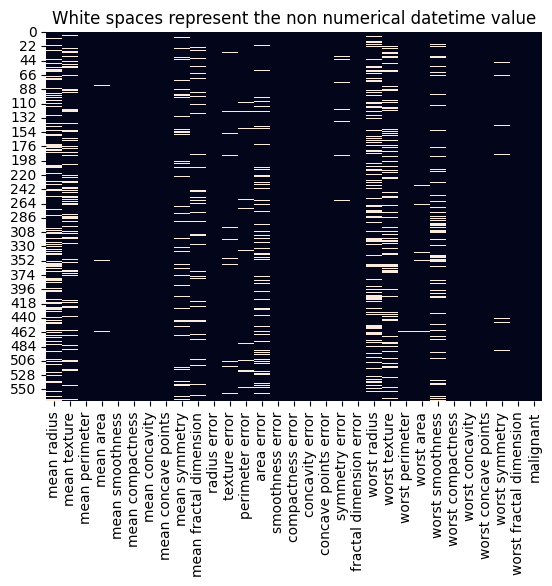

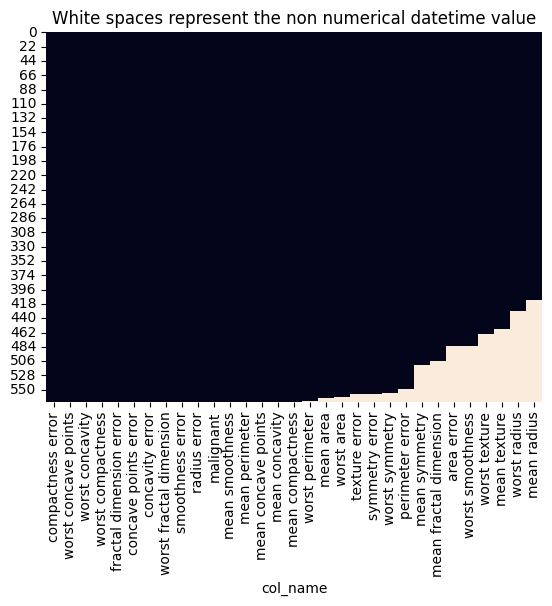

In [14]:
# Plotting the mask plot without ordering
data_mask = data.applymap(lambda x: np.isnan(x))
plt.figure()
ax = sns.heatmap(data_mask, cbar=False)
ax.set_title('White spaces represent the non numerical datetime value')

# Plotting the mask plot with ordering
## Ordering rows
for col_name in data_mask.columns:
    data_mask.loc[:,col_name] = data_mask[col_name].sort_values(ascending=True).values
## Ordering columns
cols_ranking = []
for col_name in data.columns:
    count_value,_ = count_non_numeric_values(data[col_name], verbose = False)
    cols_ranking.append([col_name,count_value])
cols_ranking = pd.DataFrame(cols_ranking, columns = ["col_name", "ranking"])
cols_ranking = cols_ranking.sort_values(by = ["ranking"])
data_mask_tmp = data_mask.copy()
for i_col, col_name in enumerate(cols_ranking["col_name"]):
    data_mask_tmp.iloc[:, i_col] = data_mask.loc[:, col_name]
data_mask = data_mask_tmp
data_mask.columns = cols_ranking["col_name"]
# Plot the ordered mask plot
plt.figure()
ax = sns.heatmap(data_mask, cbar=False)
ax.set_title('White spaces represent the non numerical datetime value')

In [15]:
data_usable = 1-data_mask.sum().sum()/data.size
print(f"In total  {round(data_usable*100,2)} of the data is usable")

In total  95.06 of the data is usable


## Conclusions
1. All the feature columns are numerical columns
2. Values with errors in the format were removed.
3. Heavy outliers were found and removed.
4. 95% of the data is usable for analysis.
5. 2% of the data were considered outliers and removed.

In [18]:
data.to_excel("Data/data_cleaned.xlsx")